In [1]:
import pathlib
import polars as pl
import matplotlib.pyplot as plt

import seaborn as sns
import IPython.display as ipd

from src import constants

%matplotlib inline

plt.style.use('ggplot')

df_train = pl.read_csv(constants.DATA_DIR / "train.csv")
ipd.display(df_train)
ipd.display(df_train.describe())

Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
i64,i64,str,str,i64,i64,i64
0,25,"""3-season skirt!""","""Adorable, well-made skirt! lin…",5,1,4
0,39,"""Very cute""","""Love the asymmetrical hem. wai…",5,1,0
0,42,"""Beautiful! fruns small for typ…","""I love this skirt! i wasn't su…",5,1,5
0,45,null,"""I was really pleased with this…",5,1,9
0,57,"""Unique, pretty asymmetric skir…","""I saw this skirt in retailer s…",5,1,1
…,…,…,…,…,…,…
232,57,"""Runs big on top""",null,3,1,5
232,58,null,"""I loved the dress, but just no…",1,1,5
232,60,"""I was really disappointed""","""I was really hoping this dress…",2,0,7


statistic,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
str,f64,f64,str,str,f64,f64,f64
"""count""",10000.0,10000.0,"""8425""","""8720""",10000.0,10000.0,10000.0
"""null_count""",0.0,0.0,"""1575""","""1280""",0.0,0.0,0.0
"""mean""",123.6563,43.3936,null,null,4.1884,0.8202,2.6293
"""std""",65.693931,12.319564,null,null,1.112668,0.38404,5.820728
"""min""",0.0,18.0,"""""go to"" tee for sz 10+ women""","""#childsize. not sure where thi…",1.0,0.0,0.0
"""25%""",65.0,34.0,null,null,4.0,1.0,0.0
"""50%""",129.0,41.0,null,null,5.0,1.0,1.0
"""75%""",170.0,52.0,null,null,5.0,1.0,3.0
"""max""",232.0,99.0,"""~~so very retailer~~""","""You would expect anything wool…",5.0,1.0,99.0


In [2]:
list(constants.DATA_DIR.glob("*"))

[PosixPath('/workspace/working/input/atmacup17/train.csv'),
 PosixPath('/workspace/working/input/atmacup17/clothing_master.csv'),
 PosixPath('/workspace/working/input/atmacup17/test.csv')]

In [3]:
df_meta = pl.read_csv(constants.DATA_DIR / "clothing_master.csv")
ipd.display(df_meta)
ipd.display(df_meta.describe())

Clothing ID,Division Name,Department Name,Class Name
i64,str,str,str
0,"""General""","""Bottoms""","""Skirts"""
1,"""General""","""Bottoms""","""Pants"""
2,"""General""","""Tops""","""Sweaters"""
3,"""General""","""Dresses""","""Dresses"""
4,"""General""","""Dresses""","""Dresses"""
…,…,…,…
228,"""General""","""Jackets""","""Outerwear"""
229,"""General""","""Bottoms""","""Jeans"""
230,"""General""","""Dresses""","""Dresses"""


statistic,Clothing ID,Division Name,Department Name,Class Name
str,f64,str,str,str
"""count""",233.0,"""233""","""233""","""233"""
"""null_count""",0.0,"""0""","""0""","""0"""
"""mean""",116.0,null,null,null
"""std""",67.405489,null,null,null
"""min""",0.0,"""General""","""Bottoms""","""Blouses"""
"""25%""",58.0,null,null,null
"""50%""",116.0,null,null,null
"""75%""",174.0,null,null,null
"""max""",232.0,"""Initmates""","""Trend""","""Trend"""


In [4]:
df_full = df_train.join(df_meta, on="Clothing ID")
ipd.display(df_full)

Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
i64,i64,str,str,i64,i64,i64,str,str,str
0,25,"""3-season skirt!""","""Adorable, well-made skirt! lin…",5,1,4,"""General""","""Bottoms""","""Skirts"""
0,39,"""Very cute""","""Love the asymmetrical hem. wai…",5,1,0,"""General""","""Bottoms""","""Skirts"""
0,42,"""Beautiful! fruns small for typ…","""I love this skirt! i wasn't su…",5,1,5,"""General""","""Bottoms""","""Skirts"""
0,45,null,"""I was really pleased with this…",5,1,9,"""General""","""Bottoms""","""Skirts"""
0,57,"""Unique, pretty asymmetric skir…","""I saw this skirt in retailer s…",5,1,1,"""General""","""Bottoms""","""Skirts"""
…,…,…,…,…,…,…,…,…,…
232,57,"""Runs big on top""",null,3,1,5,"""General""","""Dresses""","""Dresses"""
232,58,null,"""I loved the dress, but just no…",1,1,5,"""General""","""Dresses""","""Dresses"""
232,60,"""I was really disappointed""","""I was really hoping this dress…",2,0,7,"""General""","""Dresses""","""Dresses"""


In [5]:
df_full.describe()

statistic,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
str,f64,f64,str,str,f64,f64,f64,str,str,str
"""count""",10000.0,10000.0,"""8425""","""8720""",10000.0,10000.0,10000.0,"""10000""","""10000""","""10000"""
"""null_count""",0.0,0.0,"""1575""","""1280""",0.0,0.0,0.0,"""0""","""0""","""0"""
"""mean""",123.6563,43.3936,null,null,4.1884,0.8202,2.6293,null,null,null
"""std""",65.693931,12.319564,null,null,1.112668,0.38404,5.820728,null,null,null
"""min""",0.0,18.0,"""""go to"" tee for sz 10+ women""","""#childsize. not sure where thi…",1.0,0.0,0.0,"""General""","""Bottoms""","""Blouses"""
"""25%""",65.0,34.0,null,null,4.0,1.0,0.0,null,null,null
"""50%""",129.0,41.0,null,null,5.0,1.0,1.0,null,null,null
"""75%""",170.0,52.0,null,null,5.0,1.0,3.0,null,null,null
"""max""",232.0,99.0,"""~~so very retailer~~""","""You would expect anything wool…",5.0,1.0,99.0,"""Initmates""","""Trend""","""Trend"""


In [6]:
df_full["Rating"].value_counts().to_numpy()

array([[   3, 1240],
       [   5, 5552],
       [   1,  362],
       [   2,  671],
       [   4, 2175]])

In [7]:
cnts = {k: v for k, v in df_full["Rating"].value_counts().to_numpy()}
cnts = {k: cnts[k] for k in range(1, len(cnts) + 1)}
cnts

{1: 362, 2: 671, 3: 1240, 4: 2175, 5: 5552}

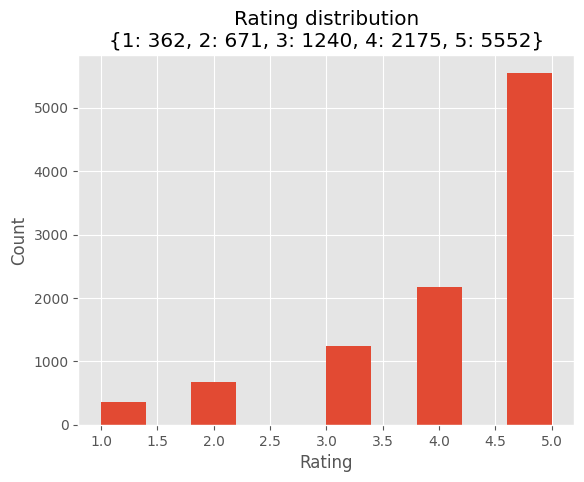

In [8]:
plt.hist(df_full["Rating"])
plt.title(f"Rating distribution\n{cnts}")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [9]:
df_full["Clothing ID"].value_counts()

Clothing ID,count
i64,u32
26,14
100,16
166,193
122,4
2,18
…,…
97,11
31,65
128,66


In [10]:
pl.Config.set_tbl_rows(50)

df_full.group_by("Clothing ID").agg(
    sum_rating=pl.sum("Rating"),
    cnt_rating=pl.count("Rating"),
    mean_rating=pl.mean("Rating"),
    std_rating=pl.std("Rating"),
).sort("cnt_rating", descending=True)

Clothing ID,sum_rating,cnt_rating,mean_rating,std_rating
i64,i64,u32,f64,f64
226,2015,480,4.197917,1.092963
83,1646,391,4.209719,1.124099
148,1469,360,4.080556,1.135234
164,1175,268,4.384328,0.970374
65,1096,264,4.151515,1.089074
80,1119,261,4.287356,0.971613
129,919,213,4.314554,1.045938
94,812,209,3.885167,1.261951
166,828,193,4.290155,1.074688


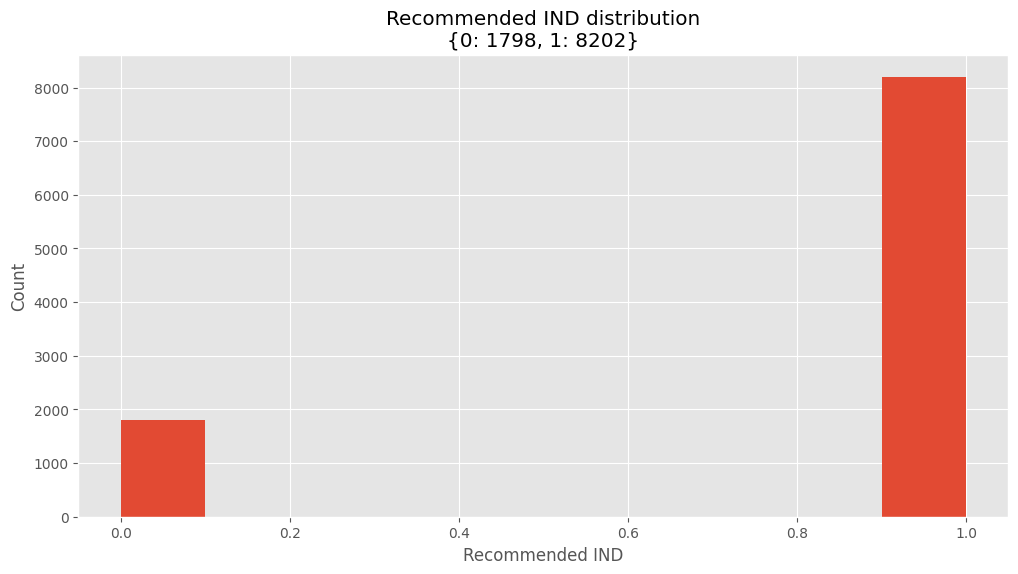

In [11]:
def value_counts_dict(series):
    return {k: v for k, v in series.value_counts().to_numpy()}

cnt = value_counts_dict(df_full["Recommended IND"])
cnt = {k: cnt[k] for k in range(2)}
plt.figure(figsize=(12, 6))
plt.hist(df_full["Recommended IND"])
plt.title(f"Recommended IND distribution\n{cnt}")
plt.xlabel("Recommended IND")
plt.ylabel("Count")
plt.show()
plt.close("all")

In [12]:
sample_sub = pl.read_csv(constants.INPUT_DIR / "atmaCup17__sample_submission.csv")
ipd.display(sample_sub)

target
f64
0.488567
0.315813
0.764448
0.980691
0.406762
0.513448
0.476032
0.094571
0.500331


In [13]:
df_test = pl.read_csv(constants.DATA_DIR / "test.csv")
ipd.display(df_test)

Clothing ID,Age,Title,Review Text,Positive Feedback Count
i64,i64,str,str,i64
0,32,"""So happy i bought this skirt!""","""I love this skirt. it does run…",0
0,34,"""Runs small""","""Beautiful patterns and colors,…",0
0,37,"""Love the comfort of thi skirt""","""It is easily paired with a nic…",0
0,39,"""Way too small""","""This is a beautiful skirt, but…",10
0,39,null,"""I usually wear a size 8/10 and…",0
0,40,"""Pretty print!""","""This print/color combination i…",4
0,41,null,null,0
0,42,"""Buckles and zippers and button…",null,9
0,43,"""Too small, too complicated""",null,0


In [14]:
df_test.join(df_meta, on="Clothing ID")

Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
i64,i64,str,str,i64,str,str,str
0,32,"""So happy i bought this skirt!""","""I love this skirt. it does run…",0,"""General""","""Bottoms""","""Skirts"""
0,34,"""Runs small""","""Beautiful patterns and colors,…",0,"""General""","""Bottoms""","""Skirts"""
0,37,"""Love the comfort of thi skirt""","""It is easily paired with a nic…",0,"""General""","""Bottoms""","""Skirts"""
0,39,"""Way too small""","""This is a beautiful skirt, but…",10,"""General""","""Bottoms""","""Skirts"""
0,39,null,"""I usually wear a size 8/10 and…",0,"""General""","""Bottoms""","""Skirts"""
0,40,"""Pretty print!""","""This print/color combination i…",4,"""General""","""Bottoms""","""Skirts"""
0,41,null,null,0,"""General""","""Bottoms""","""Skirts"""
0,42,"""Buckles and zippers and button…",null,9,"""General""","""Bottoms""","""Skirts"""
0,43,"""Too small, too complicated""",null,0,"""General""","""Bottoms""","""Skirts"""


In [15]:
df_full

Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
i64,i64,str,str,i64,i64,i64,str,str,str
0,25,"""3-season skirt!""","""Adorable, well-made skirt! lin…",5,1,4,"""General""","""Bottoms""","""Skirts"""
0,39,"""Very cute""","""Love the asymmetrical hem. wai…",5,1,0,"""General""","""Bottoms""","""Skirts"""
0,42,"""Beautiful! fruns small for typ…","""I love this skirt! i wasn't su…",5,1,5,"""General""","""Bottoms""","""Skirts"""
0,45,null,"""I was really pleased with this…",5,1,9,"""General""","""Bottoms""","""Skirts"""
0,57,"""Unique, pretty asymmetric skir…","""I saw this skirt in retailer s…",5,1,1,"""General""","""Bottoms""","""Skirts"""
0,62,"""Beautiful day to evening skirt""","""A lovely skirt and i'm so glad…",4,1,0,"""General""","""Bottoms""","""Skirts"""
0,73,"""Too small""","""I usually wear a 6 and ordered…",2,0,7,"""General""","""Bottoms""","""Skirts"""
1,26,"""Love it so much!""","""This jumpsuit is so, so cute. …",4,1,0,"""General""","""Bottoms""","""Pants"""
1,30,"""Comfy but...""","""The top is huge! i wear an xs …",3,1,0,"""General""","""Bottoms""","""Pants"""


In [16]:
df_test["Clothing ID"].value_counts()

Clothing ID,count
i64,u32
139,16
192,11
131,6
208,13
98,80
25,40
3,41
23,3
121,10


In [17]:
df_full

Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
i64,i64,str,str,i64,i64,i64,str,str,str
0,25,"""3-season skirt!""","""Adorable, well-made skirt! lin…",5,1,4,"""General""","""Bottoms""","""Skirts"""
0,39,"""Very cute""","""Love the asymmetrical hem. wai…",5,1,0,"""General""","""Bottoms""","""Skirts"""
0,42,"""Beautiful! fruns small for typ…","""I love this skirt! i wasn't su…",5,1,5,"""General""","""Bottoms""","""Skirts"""
0,45,null,"""I was really pleased with this…",5,1,9,"""General""","""Bottoms""","""Skirts"""
0,57,"""Unique, pretty asymmetric skir…","""I saw this skirt in retailer s…",5,1,1,"""General""","""Bottoms""","""Skirts"""
0,62,"""Beautiful day to evening skirt""","""A lovely skirt and i'm so glad…",4,1,0,"""General""","""Bottoms""","""Skirts"""
0,73,"""Too small""","""I usually wear a 6 and ordered…",2,0,7,"""General""","""Bottoms""","""Skirts"""
1,26,"""Love it so much!""","""This jumpsuit is so, so cute. …",4,1,0,"""General""","""Bottoms""","""Pants"""
1,30,"""Comfy but...""","""The top is huge! i wear an xs …",3,1,0,"""General""","""Bottoms""","""Pants"""
